<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/Ke%C5%9Fif%C3%A7i%20Veri%20Analizi/Ke%C5%9Fif%C3%A7iVeri_Analizi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneler

* Matplotlib

* Pandas

* Seaborn

* ggplot

* Bokeh

* Plot.ly

# Veriye İlk Bakış

In [ ]:
import seaborn as sns
planets= sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Metod             : Gezegenlerin bulunma şekli

Number            : Bulunan sistemlerdeki gezegen sayısı

Orbital Period    : Yörünge periyodu

Mass              : Kütle

Distance          : Uzaklık

Year              : Bulunma tarihi

In [ ]:
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
#Veri seti yapısal bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
#Sadece değişken yapısal bilgileri için
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
#Değişken tipini değiştirme
import pandas as pd
df.method=pd.Categorical(df.method)

In [ ]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# Veri Setinin Betimlenmesi

In [ ]:
df.shape

(1035, 6)

In [ ]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [ ]:
#df.describe  : Bu metod eksik bilgileri ve kategorik değişkenleri dışarıda bırakarak betimsel istatistik sunar
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
#Hiç eksik gözlem var mı?
df.isnull().values.any()

True

In [ ]:
#Hangi değişkende kaçar tane
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
#Eksik değerler yerine 0/ortalama değeri basılabilir
#
#df["degisken_ad"].fillna(0,inplace=True)

In [ ]:
#Ortalama değerle doldurmak için
#df["orbital_period"].fillna(df.orbital_period.mean(), inplace=True)

In [ ]:
#Tüm eksik değerler yerine ortalama değerlerin atanması
df.fillna(df.mean(), inplace=True)

<ipython-input-16-31474811f75e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [ ]:
#Veri setinin bozulmamış halini tekrar yükleme
planets= sns.load_dataset("planets")
df=planets.copy()

In [ ]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# Kategorik Değişken Özetleri

In [ ]:
import seaborn as sns
planets= sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Sadece Kategorik Değişkenler ve Özetleri

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
#İstenilen tipe göre veri çekmek için
#Kategorik için category
kat_df = df.select_dtypes(include=["object"])

In [ ]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


##Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [ ]:
#Kategorik değişkenin sınıf bilgileri
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [ ]:
#Sınıfları saydırmak
kat_df["method"].value_counts().count()

10

## Kategorik Değişkenin Sınıflarından Frekansları
Her sınıfta kaçar tane sample var 

In [ ]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

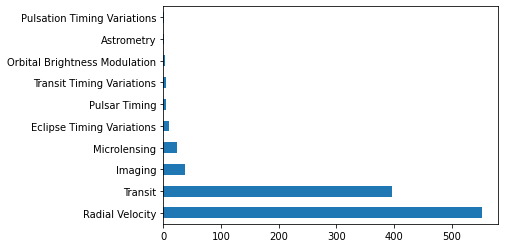

In [ ]:
#Barh: sütun bilgisi
df["method"].value_counts().plot.barh();

# Sürekli Değişken Özetleri

In [ ]:
import seaborn as sns
planets= sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
#Sadece sürekli değişkenlerin seçimi
df_num = df.select_dtypes(include=["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [ ]:
#Sürekli değişkenlerin betimsel istatistiği
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
#Belirli bir değişken üzerine betimlemek
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [ ]:
print("Ortalama           :"+str(df_num["distance"].mean()))
print("Dolu Gözlem Sayıcı :"+str(df_num["distance"].count()))
print("Maksimum Değer     :"+str(df_num["distance"].max()))
print("Minimum Değer      :"+str(df_num["distance"].min()))
print("Medyan             :"+str(df_num["distance"].median()))
print("Standart sapma     :"+str(df_num["distance"].std()))

Ortalama           :264.06928217821786
Dolu Gözlem Sayıcı :808
Maksimum Değer     :8500.0
Minimum Değer      :1.35
Medyan             :55.25
Standart sapma     :733.1164929404421


# Veri Seti Hikayesi


## Dağılım Grafikleri

Sürekli (Sayısal) / Kategorik Değişkenlerin Dağılımı Görsel Teknik ile İfade etme


---



---



***Barplot(Sütun Grafik):***  Kategorik Değişkenleri Görselleştirmek İçin Kullanılır




---


**Veri Seti Hikayesi**

*price :* Dolar cinsinde fiyat(326-18,823)

*carat :* Ağırlık(0.2-5.01)

*cut   :* Kalite (Fair, Good, Very Good, Premium, Ideal)

*color :* Renk (form J(worst) to D (best))

*clarity :* Temizlik, Berraklık (I1 (worst), SI1, SI2, VS2, VS1, VVS2, VVS2, IF (Best))

*x :* Length in mm (0-10.74)

*y :* Width in mm (0-58.9)

*z :* Depth in mm (0-31.8)

*depth :* Toplam derinlik Yüzdesi = z/mean(x,y) = 2*z/(x+y)(43-79)

*table :* Elmasın en geniş noktasına göre genişliği (43-95)

In [ ]:
import seaborn as sns
diamonds =sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Kategorik Değişkenlerimiz Nominal Değil Ordinal(Kötüden- İyiye)

In [ ]:
#Ordinal Tanımlama
from pandas.api.types import CategoricalDtype

In [ ]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
#Cut 'ı ordinal yap
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [ ]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

Sıralama hatalı olduğu için düzeltilmesi gerekir.

In [ ]:
cut_kategori = ["Fair","Good","Very Good","Premium","Ideal"]

In [ ]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategori, ordered=True))

In [ ]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']



---

Color için

In [ ]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
color_kategori = ["J","I","H","G","F","E","D"]

In [ ]:
df.color=df.color.astype(CategoricalDtype(categories=color_kategori, ordered=True))

In [ ]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']



---
Clarity İçin


In [ ]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [ ]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
clarity_kategori = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [ ]:
df.clarity=df.clarity.astype(CategoricalDtype(categories=clarity_kategori, ordered=True))

In [ ]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']



---



---

##Bar Plot

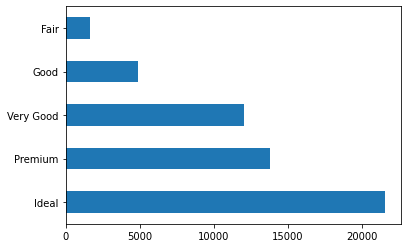

In [ ]:
df["cut"].value_counts().plot.barh();

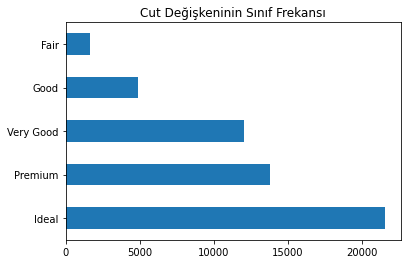

In [ ]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansı");

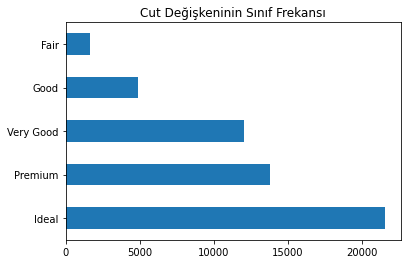

In [ ]:
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Cut Değişkeninin Sınıf Frekansı"));

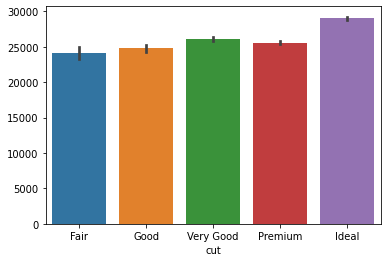

In [ ]:
#Seaborn ile gerçekleştirim
sns.barplot(x="cut", y=df.cut.index, data=df);

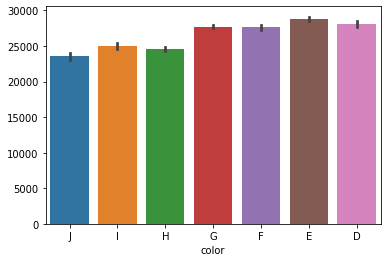

In [ ]:
#Seaborn ile "color" gerçekleştirim
sns.barplot(x="color", y=df.color.index, data=df);

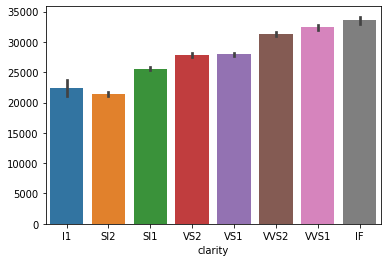

In [ ]:
#Seaborn ile "clarity" gerçekleştirim
sns.barplot(x="clarity", y=df.clarity.index, data=df);

# Sütun Grafik Çaprazlama

In [1]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
cut_kategori = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategori, ordered=True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Kategorik değişken ile sayısal değişkenin çaprazlayarak değerlendirilmesi.

catplot: Kategorik değişkenleri görselleştirmek için kullanılan fonksiyon

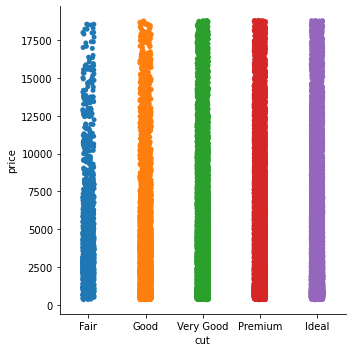

In [2]:
sns.catplot(x="cut", y="price", data=df);

Burada kalite olarak Premium kategorisinde yer alan elmasların yüksek fiyata giden daha fazla ürün olduğu görülmektedir.

Fakat burada Premium'un ardından gelen oysa kalite olarak Premiumdan üstün Ideal kategorisinde seyrekliğe neden olan durumları anlayabilmek için diğer kırılımların incelenmesi gerekir.


---



---



In [3]:
color_kategori = ["J","I","H","G","F","E","D"]
df.color=df.color.astype(CategoricalDtype(categories=color_kategori, ordered=True))
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

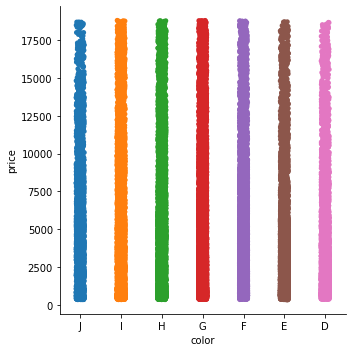

In [4]:
sns.catplot(x="color", y="price", data=df);

Renkleri temsil eden bu grafikte ise H, G ve F kategorilerinin daha fazla doluluğa sahip olduğu görülmektedir.

---

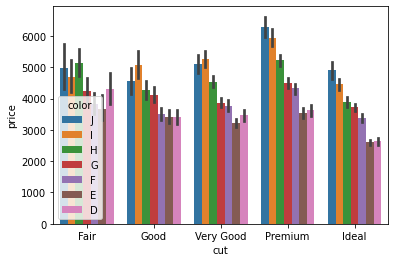

In [5]:
sns.barplot(x="cut", y="price", hue="color" , data=df);

Kalite~Fiyat grafiğine Renk kırılımı eklendiğinde J,I ve H renkleri burada fiyat olarak daha yüksek seyirlerde yer almakta ve Premium kategorisindeki renk değerleri diğer kategorilere göre yüksek fiyatlara eriştiği görülmektedir.


---

In [6]:
#Cut ve color'a göre gurupla ve price a göre ortalama değer
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

In [7]:
clarity_kategori = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.clarity=df.clarity.astype(CategoricalDtype(categories=clarity_kategori, ordered=True))
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

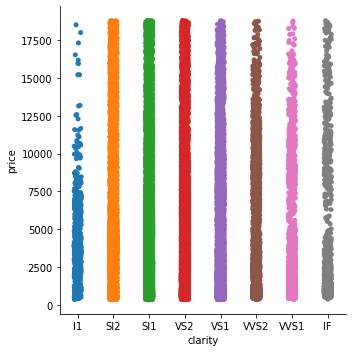

In [8]:
sns.catplot(x="clarity", y="price", data=df);

Elmasların berraklığını temsil eden grafikte SI2, SI1, VS2, VS1 kategorilerinde yüksek fiyat değeri aldığı, yüksek kalitelerde ise seyreldiği gözlenmektedir.


---



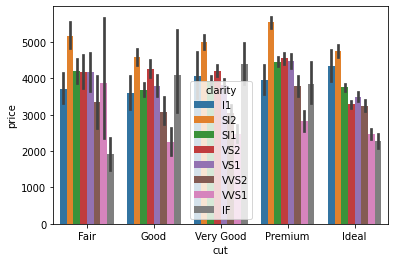

In [9]:
sns.barplot(x="cut", y="price", hue="clarity" , data=df);

Kalite~Fiyat grafiğine berraklık kırılımı eklendiğinde, Premium kategorisinde bütün berraklık kategorilerinin yüksek fiyat değerleri aldığı görülmektedir. 

---


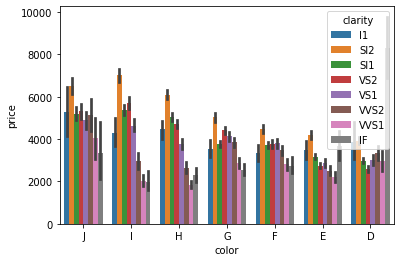

In [10]:
sns.barplot(x="color", y="price", hue="clarity" , data=df);

Grafikte görüleceği üzere J,I ve H renklerinin berraklığa bakılmaksızın yüksek fiyat değeri aldığı ve özellikle de J renginde standart sapmanın yüksek olduğu değerler görülmektedir.

Berraklık olarak en iyi değeri temsil eden IF kategorisinde ise D rengi en yüksek fiyat değeri aldığı görülmektedir.

In [11]:
#Cut ve color'a göre gurupla ve price a göre ortalama değer
df.groupby(["color","clarity"])["price"].mean()

color  clarity
J      I1         5254.060000
       SI2        6520.958246
       SI1        5186.048000
       VS2        5311.058824
       VS1        4884.461255
       VVS2       5142.396947
       VVS1       4034.175676
       IF         3363.882353
I      I1         4302.184783
       SI2        7002.649123
       SI1        5355.019663
       VS2        5690.505560
       VS1        4633.183992
       VVS2       2968.232877
       VVS1       2034.861972
       IF         1994.937063
H      I1         4453.413580
       SI2        6099.895074
       SI1        5032.414945
       VS2        4722.414486
       VS1        3780.688623
       VVS2       2649.067434
       VVS1       1845.658120
       IF         2287.869565
G      I1         3545.693333
       SI2        5021.684109
       SI1        3774.787449
       VS2        4416.256498
       VS1        4131.362197
       VVS2       3845.283437
       VVS1       2866.820821
       IF         2558.033774
F      I1         3342.18

In [16]:
df.groupby(["clarity"])["price"].std()

clarity
I1      2806.778270
SI2     4260.458578
SI1     3799.483853
VS2     4042.302816
VS1     4011.747958
VVS2    3821.647537
VVS1    3334.838888
IF      3920.248499
Name: price, dtype: float64

In [19]:
df.groupby(["clarity"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
I1,741.0,3924.168691,2806.778270,345.0,2080.00,3344.0,5161.00,18531.0
SI2,9194.0,5063.028606,4260.458578,326.0,2264.00,4072.0,5777.25,18804.0
SI1,13065.0,3996.001148,3799.483853,326.0,1089.00,2822.0,5250.00,18818.0
VS2,12258.0,3924.989395,4042.302816,334.0,900.00,2054.0,6023.75,18823.0
VS1,8171.0,3839.455391,4011.747958,327.0,876.00,2005.0,6023.00,18795.0
VVS2,5066.0,3283.737071,3821.647537,336.0,794.25,1311.0,3638.25,18768.0
VVS1,3655.0,2523.114637,3334.838888,336.0,816.00,1093.0,2379.00,18777.0
IF,1790.0,2864.839106,3920.248499,369.0,895.00,1080.0,2388.50,18806.0


In [22]:
df.groupby(["color"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
J,2808.0,5323.818020,4438.187251,335.0,1860.5,4234.0,7695.00,18710.0
I,5422.0,5091.874954,4722.387604,334.0,1120.5,3730.0,7201.75,18823.0
H,8304.0,4486.669196,4215.944171,337.0,984.0,3460.0,5980.25,18803.0
G,11292.0,3999.135671,4051.102846,354.0,931.0,2242.0,6048.00,18818.0
F,9542.0,3724.886397,3784.992007,342.0,982.0,2343.5,4868.25,18791.0
E,9797.0,3076.752475,3344.158685,326.0,882.0,1739.0,4003.00,18731.0
D,6775.0,3169.954096,3356.590935,357.0,911.0,1838.0,4213.50,18693.0


In [23]:
df.groupby(["cut"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0


#Histogram ve Yoğunluk Grafikleri
Sayısal değişkenler ve dağılımları için kullanılır

In [24]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


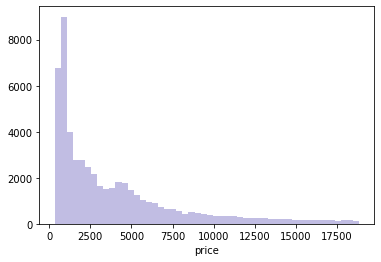

In [28]:
#Dağılım görselleştirmek için distplot
#Yoğunluk için kde parametresi kullanılır
sns.distplot(df.price, color="#645CBB", kde=False);

In [29]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


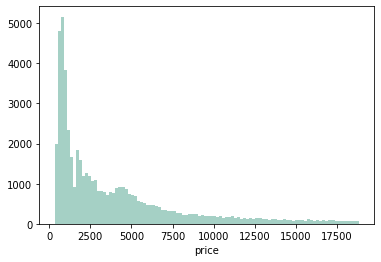

In [34]:
#bins aralık sayısını belirler
sns.distplot(df.price, kde=False,color="#1F8A70", bins=100);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


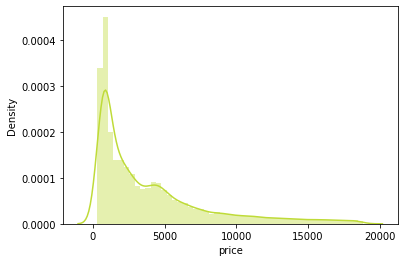

In [35]:
#Yoğunluk grafiği
sns.distplot(df.price, color="#BFDB38");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


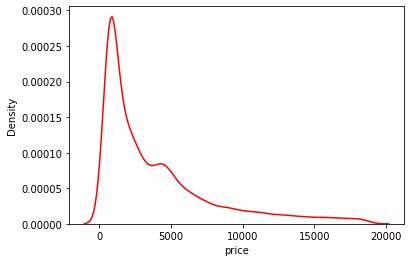

In [40]:
#Sadece Yoğunluk grafiği
sns.distplot(df.price, color="red", hist=False);

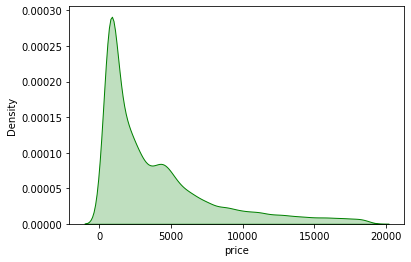

In [42]:
#Dağılım grafiğinin altı doldurularak
sns.kdeplot(df.price, color="green", shade=True);

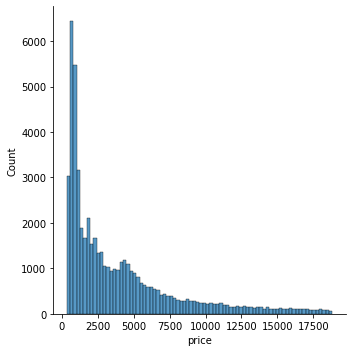

In [37]:
sns.displot(df.price);

#Çaprazlamalar

In [49]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


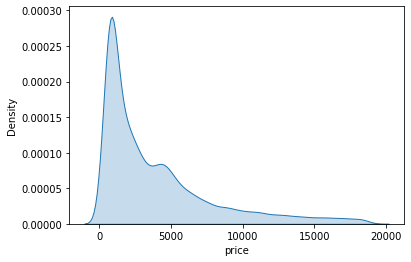

In [51]:
sns.kdeplot(df.price, shade=True);



---

Mavi alanın tepelerin sebebi nedir? Arka planında ne var?
Öncelikle kategorileri düzenlemeliyiz

In [55]:
cut_kategori = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategori, ordered=True))
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [60]:
color_kategori = ["J","I","H","G","F","E","D"]
df.color=df.color.astype(CategoricalDtype(categories=color_kategori, ordered=True))
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [62]:
clarity_kategori = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.clarity=df.clarity.astype(CategoricalDtype(categories=clarity_kategori, ordered=True))
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

Cut


---




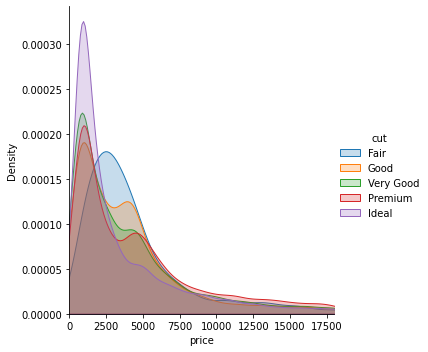

In [58]:
(sns.FacetGrid(df,                #FaceGrid=Eklenen boyutları bölerek gösterir
                hue="cut",        #Boyut ekleme
                height=5,         #
                xlim=(0,18000))   #X ekseni aralığı
        .map(sns.kdeplot,         #Cut değişkeninin sınıfları boyutları olarak ekleniyor
            "price",        
            shade=True)         
        .add_legend());  

Daha düşük fiyat değerlerinde de Ideal, Premium, Very Good kategorileri samplelarının yer aldığı görülmektedir.

Color


---




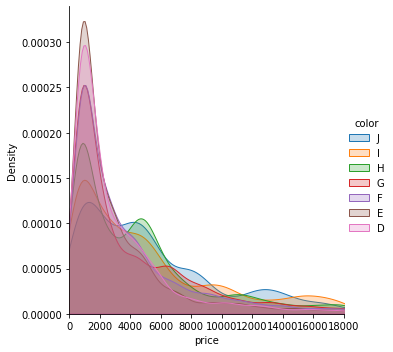

In [65]:
(sns.FacetGrid(df,                #FaceGrid=Eklenen boyutları bölerek gösterir
                hue="color",        #Boyut ekleme
                height=5,         #
                xlim=(0,18000))   #X ekseni aralığı
        .map(sns.kdeplot,         #Color değişkeninin sınıfları boyutları olarak ekleniyor
            "price",        
            shade=True)         
        .add_legend());  

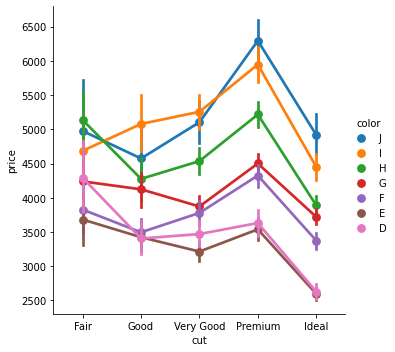

In [64]:
sns.catplot(x="cut",
            y="price",
            hue="color",
            kind="point", #tür
            data=df);

Renk değerlerinin fiyat performansı açısından durumunu gözlemlememize olanak tanıyan bu grafikte, (cut)kalite kategorisi üzerinden renklerin Premium(oldukça etkin olarak) ve Ideal kategorileri üzerinde belirleyici rol aldığı görülmekte.

Clarity


---




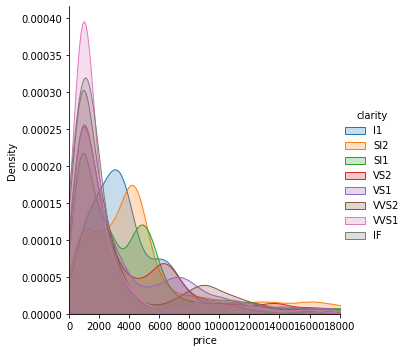

In [67]:
(sns.FacetGrid(df,                #FaceGrid=Eklenen boyutları bölerek gösterir
                hue="clarity",    #Boyut ekleme
                height=5,         #
                xlim=(0,18000))   #X ekseni aralığı
        .map(sns.kdeplot,         #Clarity değişkeninin sınıfları boyutları olarak ekleniyor
            "price",        
            shade=True)         
        .add_legend());  

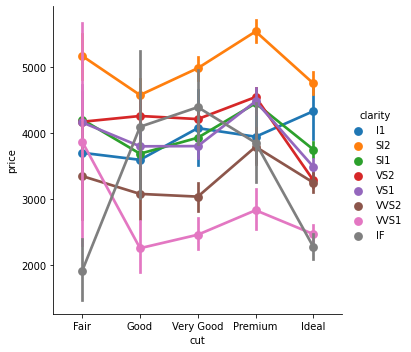

In [66]:
sns.catplot(x="cut",
            y="price",
            hue="clarity",
            kind="point", #tür
            data=df);